In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from scripts.processing import clean_data, pre_process_data
from scripts.tp_col_groups import TP_REGION_COLS, TP_INJURY_COLS, TP_TYPE_COLS

pd.set_option('display.max_columns', None)

In [2]:
raw_train_data = pd.read_csv('data/train.csv')
train_data = clean_data(raw_train_data)

train_data = train_data[(train_data['Incurred'] - train_data['Incurred'].mean()) / train_data['Incurred'].std() < 2]

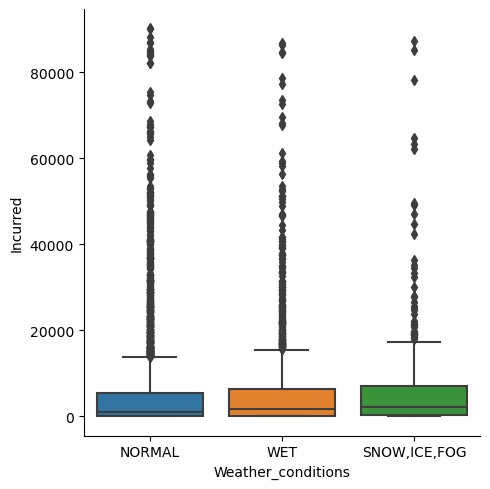

In [5]:
sns.catplot(x='Weather_conditions', y='Incurred', data=train_data, kind='box')

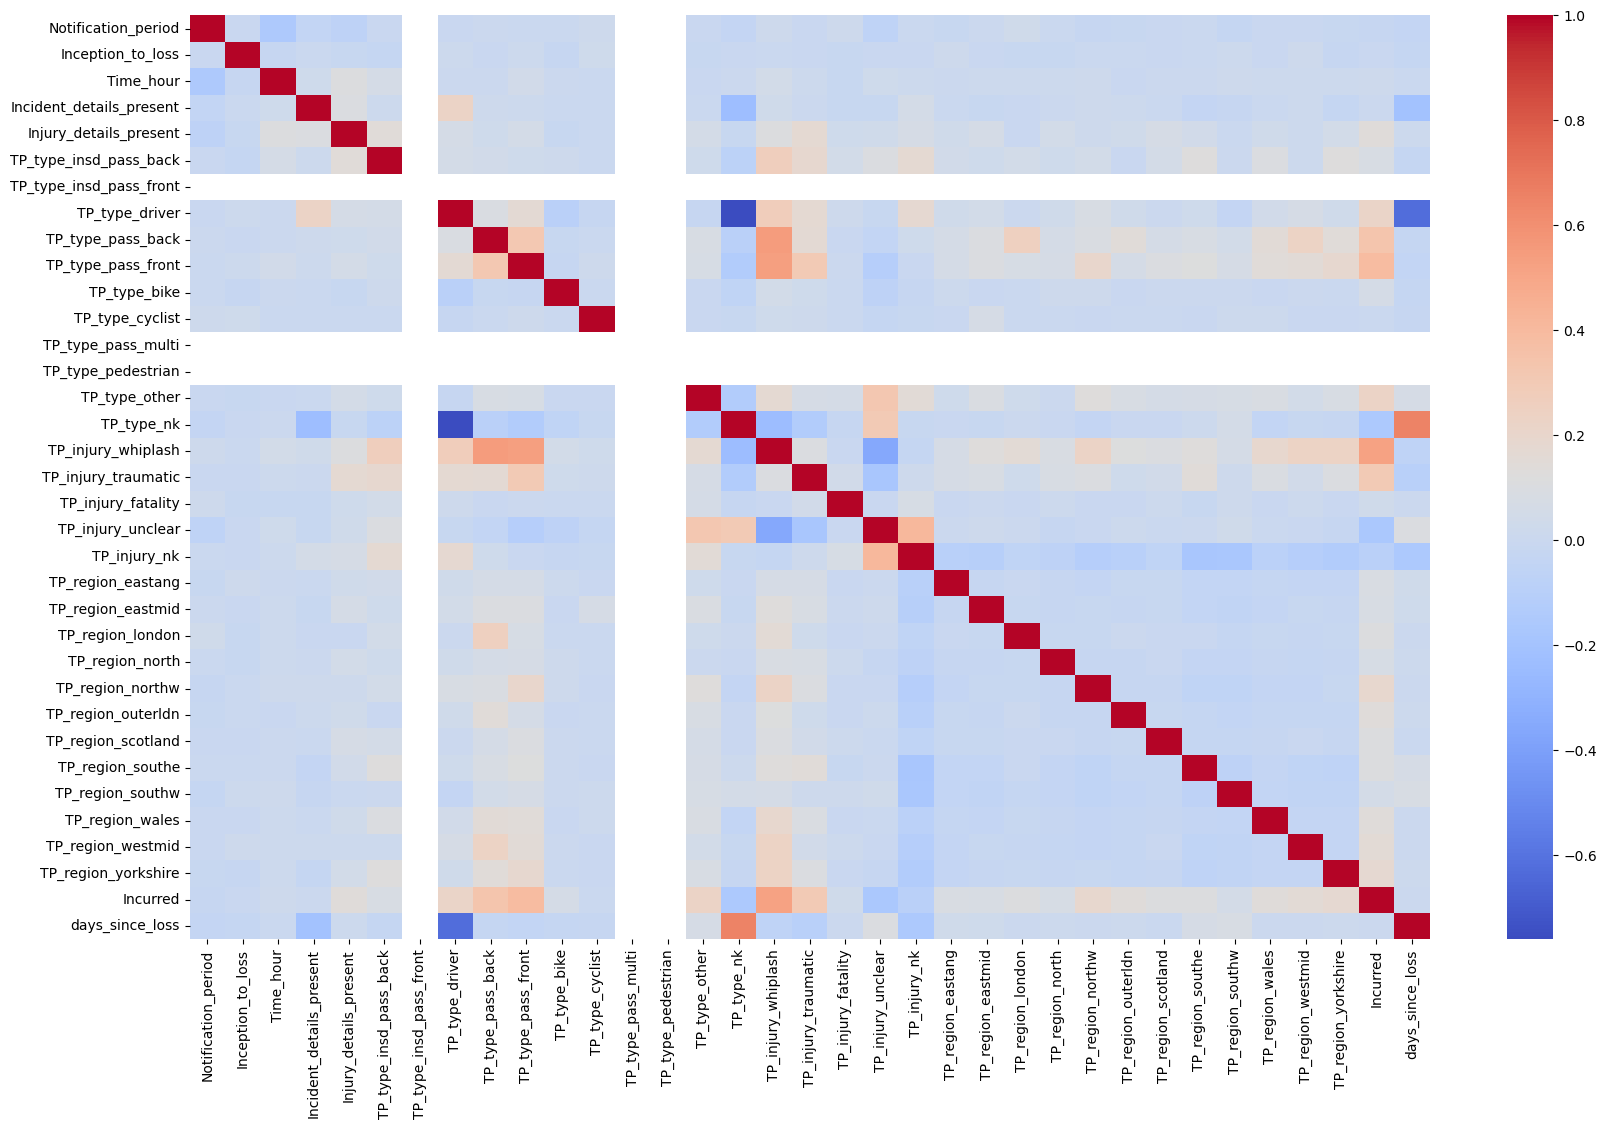

In [6]:
correlation_matrix = train_data.corr(numeric_only=True)
plt.figure(figsize=(20, 12))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.show()

In [7]:
train_data.columns

Index(['Notifier', 'Notification_period', 'Inception_to_loss',
       'Location_of_incident', 'Weather_conditions', 'Vehicle_mobile',
       'Time_hour', 'Main_driver', 'PH_considered_TP_at_fault',
       'Incident_details_present', 'Injury_details_present',
       'TP_type_insd_pass_back', 'TP_type_insd_pass_front', 'TP_type_driver',
       'TP_type_pass_back', 'TP_type_pass_front', 'TP_type_bike',
       'TP_type_cyclist', 'TP_type_pass_multi', 'TP_type_pedestrian',
       'TP_type_other', 'TP_type_nk', 'TP_injury_whiplash',
       'TP_injury_traumatic', 'TP_injury_fatality', 'TP_injury_unclear',
       'TP_injury_nk', 'TP_region_eastang', 'TP_region_eastmid',
       'TP_region_london', 'TP_region_north', 'TP_region_northw',
       'TP_region_outerldn', 'TP_region_scotland', 'TP_region_southe',
       'TP_region_southw', 'TP_region_wales', 'TP_region_westmid',
       'TP_region_yorkshire', 'Incurred', 'days_since_loss'],
      dtype='object')

In [8]:
# get total column by adding all values from the TP_TYPE list
train_data['Total'] = train_data[TP_REGION_COLS].sum(axis=1)

<Axes: xlabel='Total', ylabel='Incurred'>

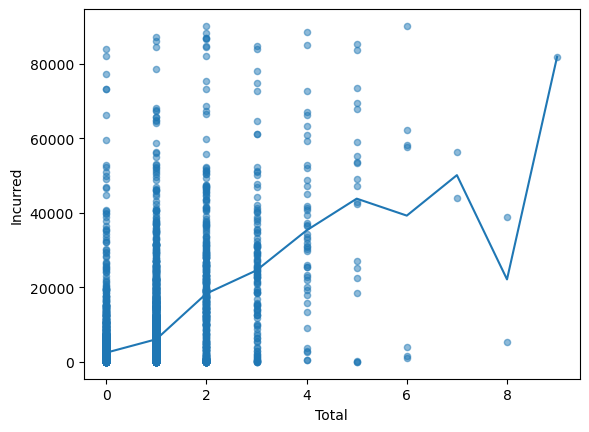

In [9]:
train_data.plot.scatter(x='Total', y='Incurred', alpha=0.5)
train_data.groupby('Total')['Incurred'].mean().plot()

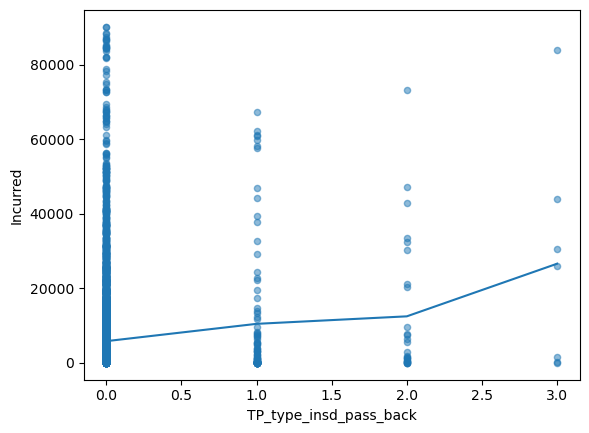

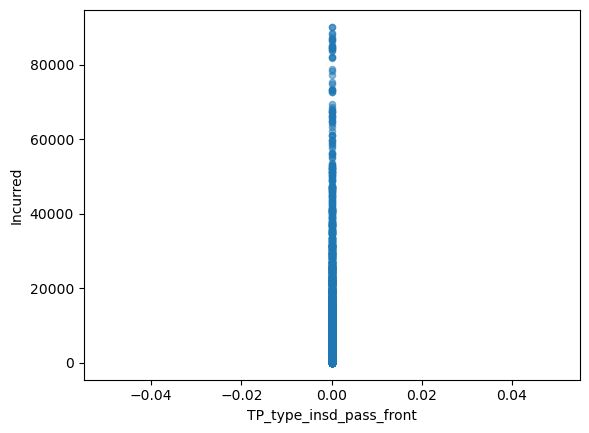

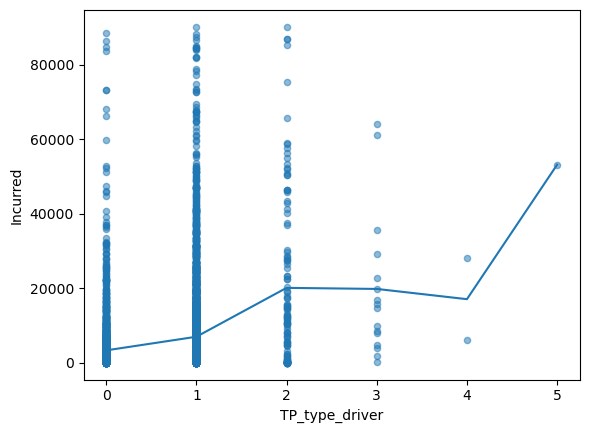

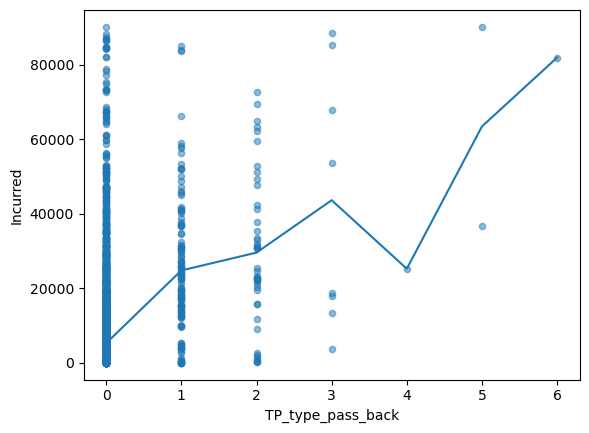

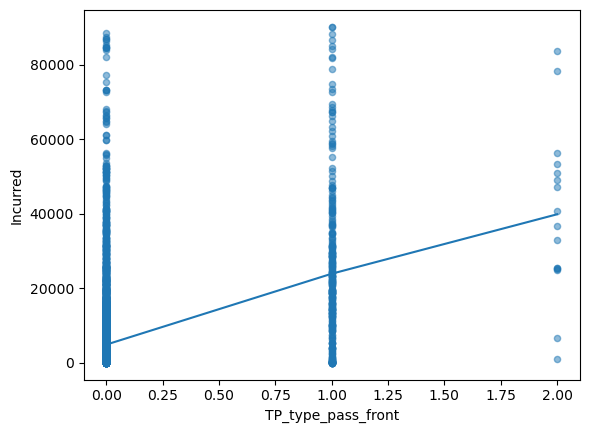

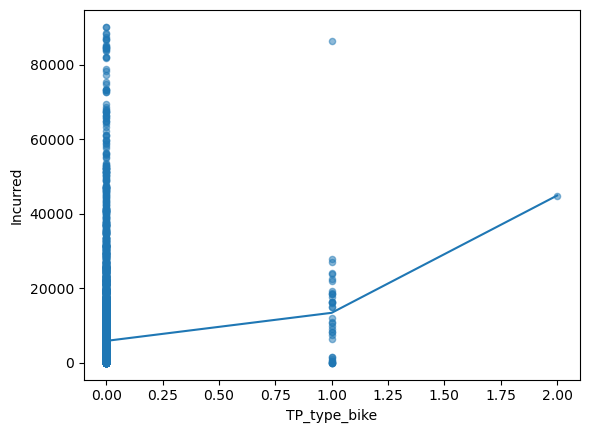

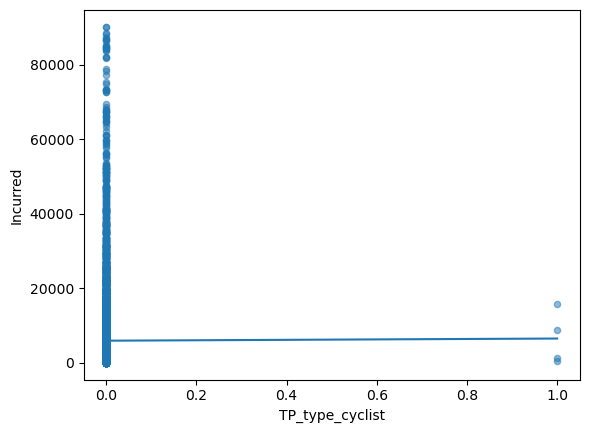

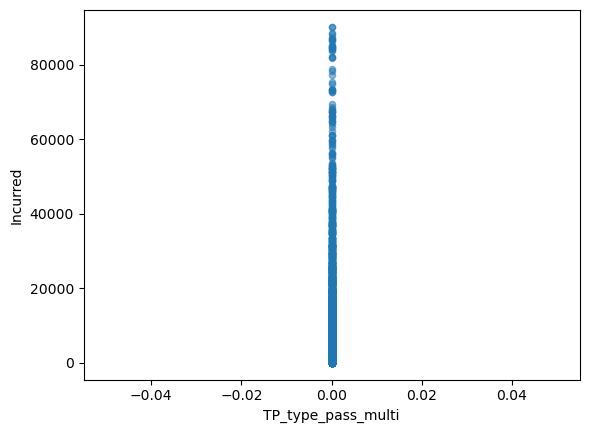

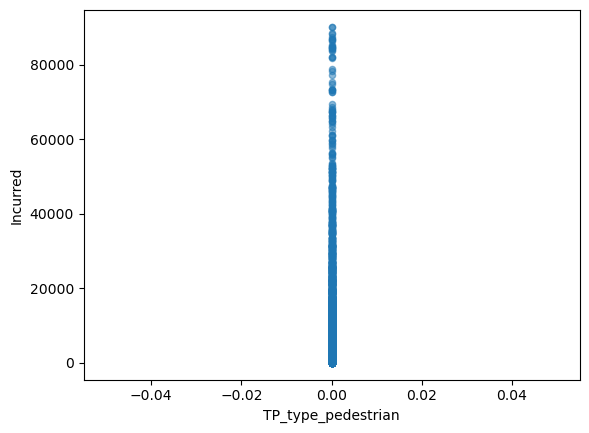

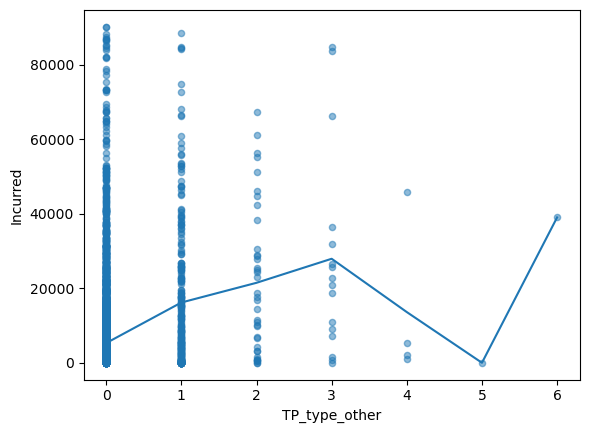

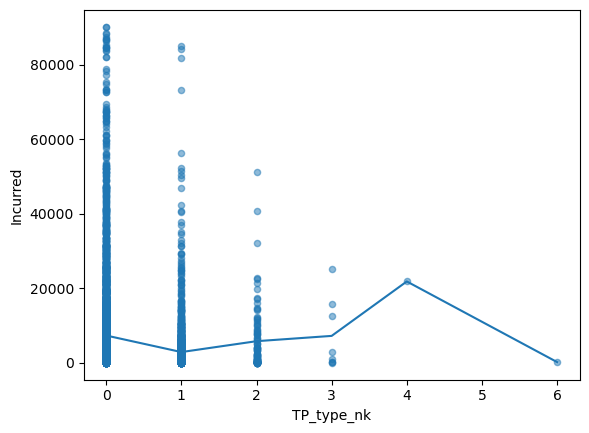

In [10]:
for col in TP_TYPE_COLS:
    train_data.plot.scatter(x=col, y='Incurred', alpha=0.5)
    train_data.groupby(col)['Incurred'].mean().plot()

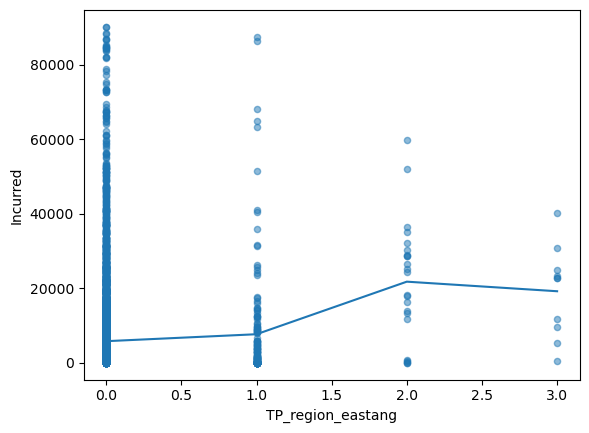

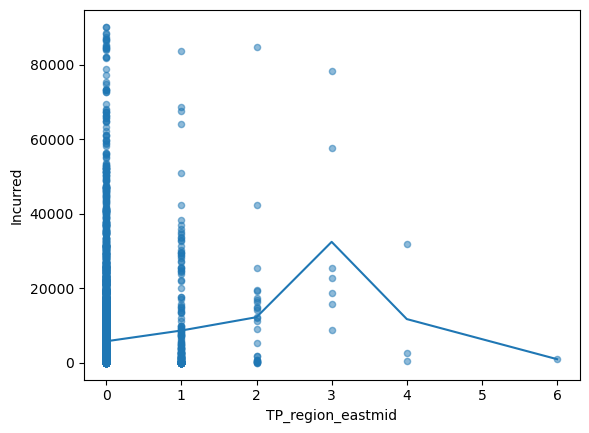

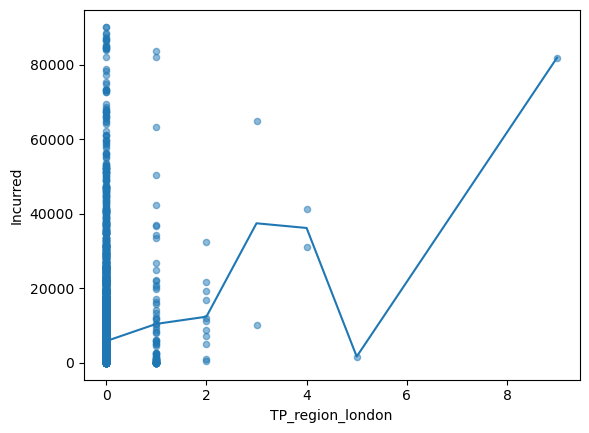

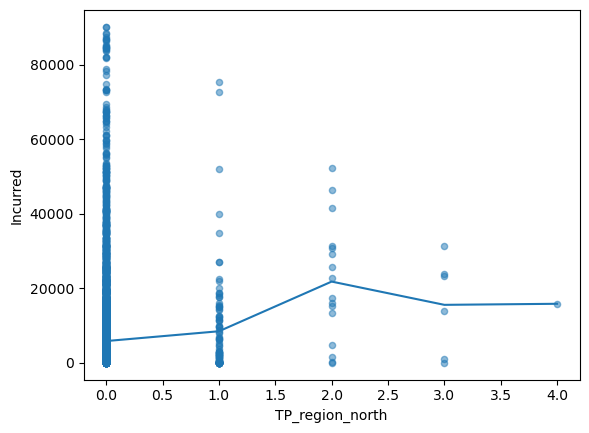

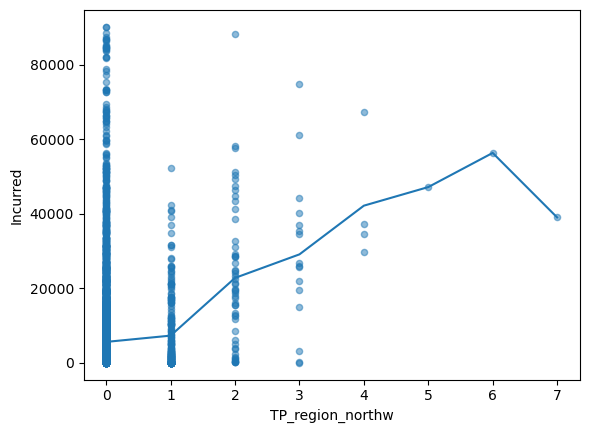

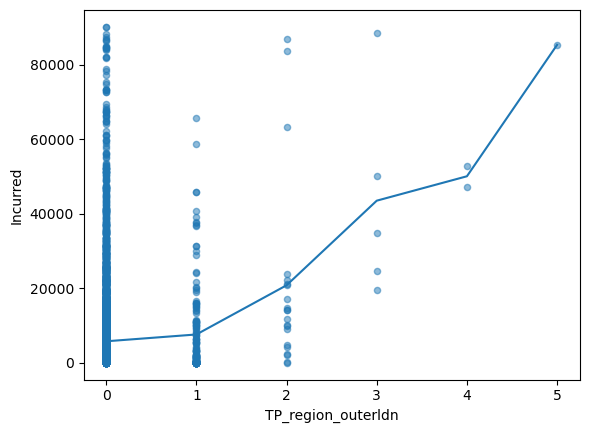

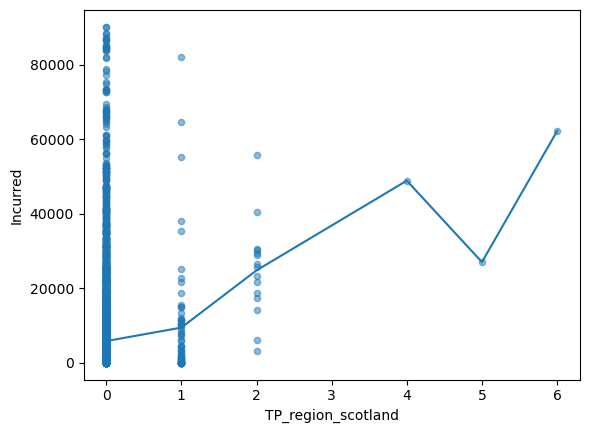

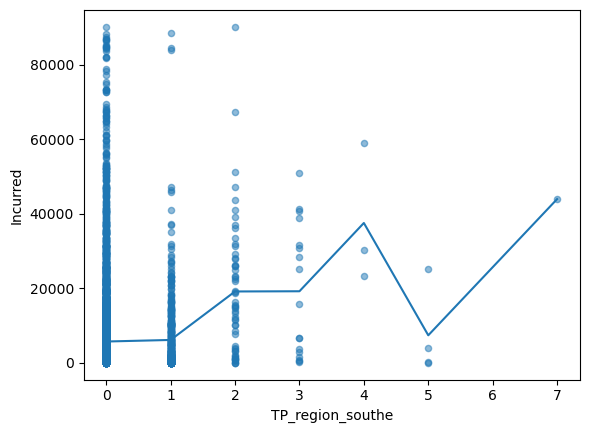

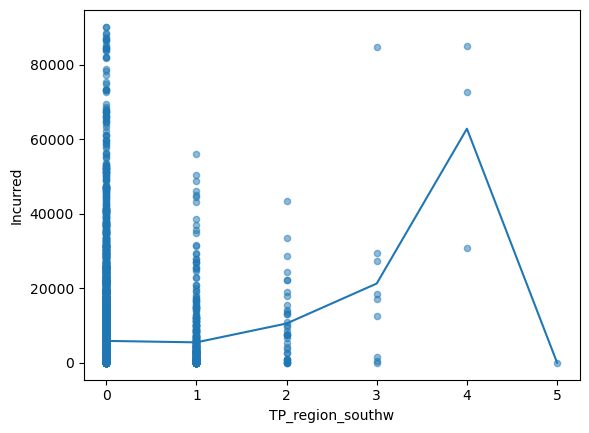

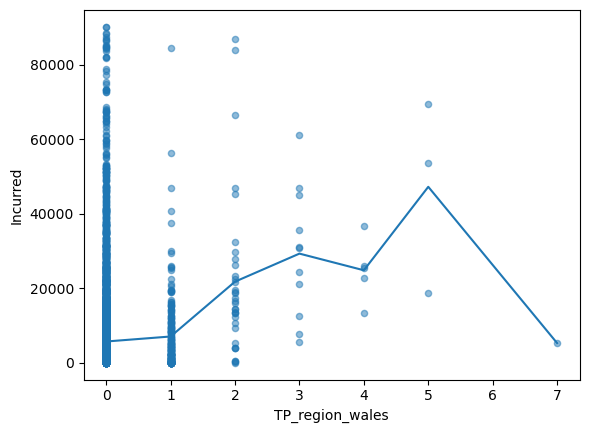

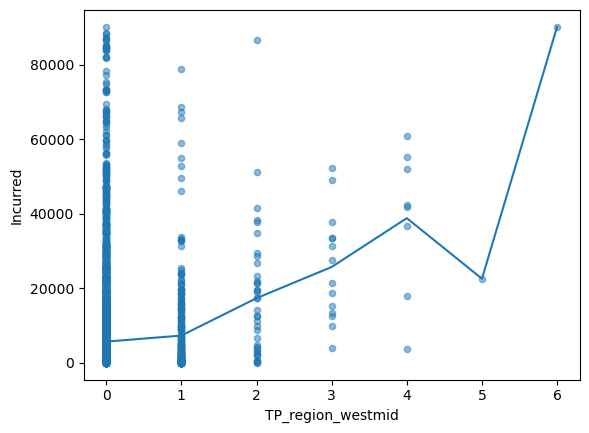

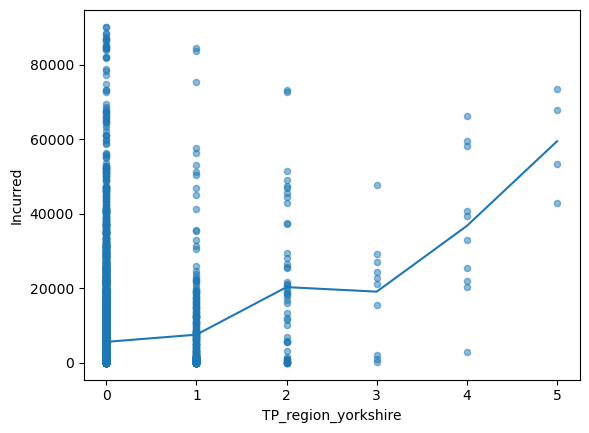

In [11]:
for col in TP_REGION_COLS:
    train_data.plot.scatter(x=col, y='Incurred', alpha=0.5)
    train_data.groupby(col)['Incurred'].mean().plot()

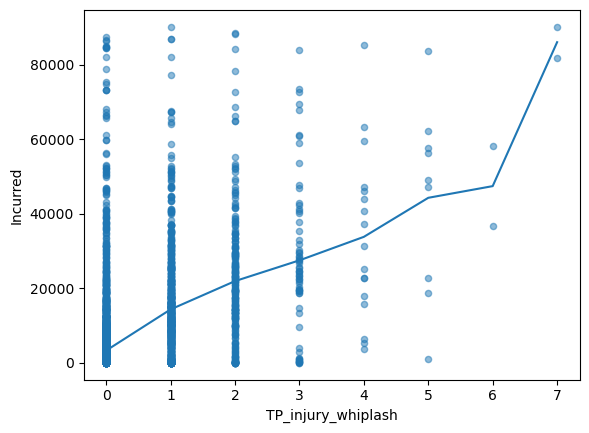

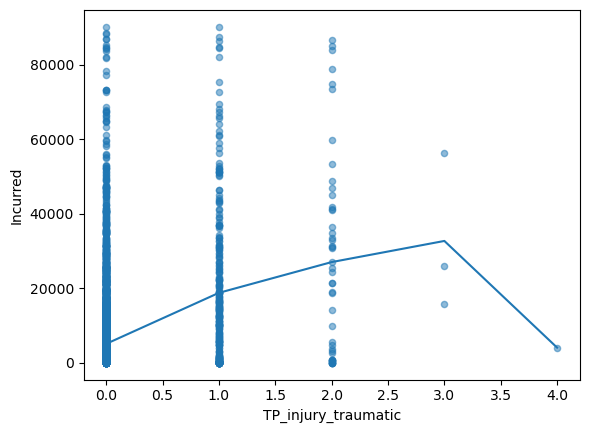

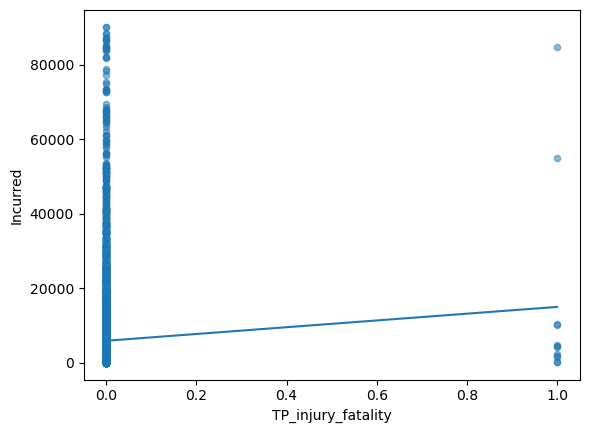

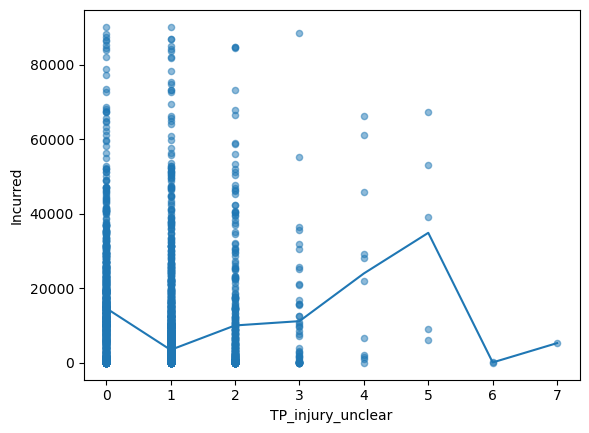

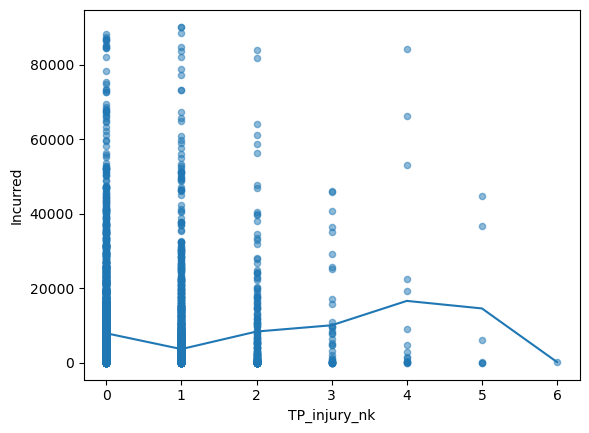

In [12]:
for col in TP_INJURY_COLS:
    train_data.plot.scatter(x=col, y='Incurred', alpha=0.5)
    train_data.groupby(col)['Incurred'].mean().plot()

<Axes: xlabel='Notification_period', ylabel='Incurred'>

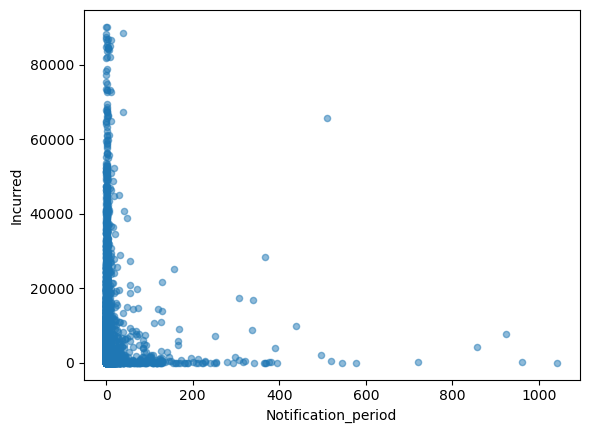

In [13]:
train_data.plot.scatter(x='Notification_period', y='Incurred', alpha=0.5)

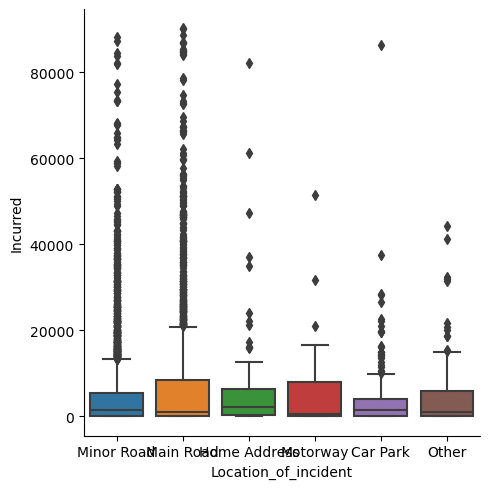

In [14]:
sns.catplot(x='Location_of_incident', y='Incurred', data=train_data, kind='box')

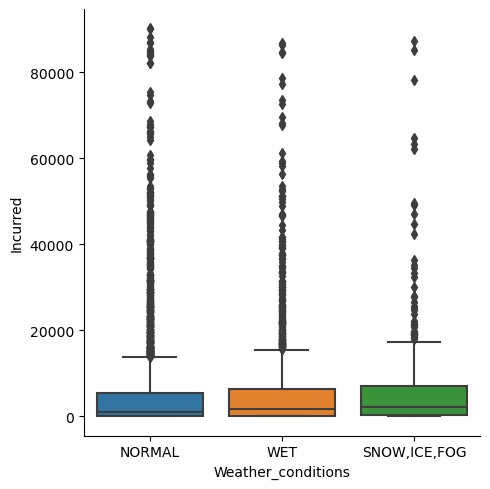

In [15]:
sns.catplot(x='Weather_conditions', y='Incurred', data=train_data, kind='box')

In [16]:
# NEW COLUMN CALLED IS_NIGHT
# 1 if Time_hour is greater than or equal to 20 or less than or equal to 5 otherwiser 0
train_data['is_night'] = train_data['Time_hour'].apply(lambda x: 1 if x >= 20 or x <= 5 else 0)

In [17]:
train_data

,Notifier,Notification_period,Inception_to_loss,Location_of_incident,Weather_conditions,Vehicle_mobile,Time_hour,Main_driver,PH_considered_TP_at_fault,Incident_details_present,Injury_details_present,TP_type_insd_pass_back,TP_type_insd_pass_front,TP_type_driver,TP_type_pass_back,TP_type_pass_front,TP_type_bike,TP_type_cyclist,TP_type_pass_multi,TP_type_pedestrian,TP_type_other,TP_type_nk,TP_injury_whiplash,TP_injury_traumatic,TP_injury_fatality,TP_injury_unclear,TP_injury_nk,TP_region_eastang,TP_region_eastmid,TP_region_london,TP_region_north,TP_region_northw,TP_region_outerldn,TP_region_scotland,TP_region_southe,TP_region_southw,TP_region_wales,TP_region_westmid,TP_region_yorkshire,Incurred,days_since_loss,Total,is_night
Claim Number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4661,PH,0,132,Minor Road,NORMAL,N,8,Y,N,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,70.313430,4082,1,0
4411,Other,0,151,Main Road,WET,N,15,Y,Y,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1297.932979,4187,1,0
502,Other,2,46,Minor Road,NORMAL,Y,22,N,None,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1657.223845,7007,1,1
2433,PH,0,262,Minor Road,WET,Y,13,Y,None,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,31104.732862,5258,2,0
6923,Other,0,344,Main Road,"SNOW,ICE,FOG",N,6,Y,N,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,156.423382,3494,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5227,NamedDriver,1,177,Main Road,NORMAL,N,12,Y,N,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1405.919514,3900,0,0
5391,PH,0,80,Minor Road,WET,Y,9,Y,N,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,3853,0,0
861,PH,0,56,Minor Road,WET,N,9,N,None,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,5048.486848,6547,0,0


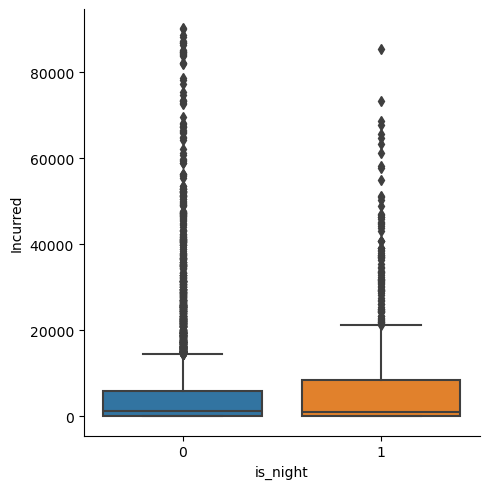

In [18]:
sns.catplot(x='is_night', y='Incurred', data=train_data, kind='box')

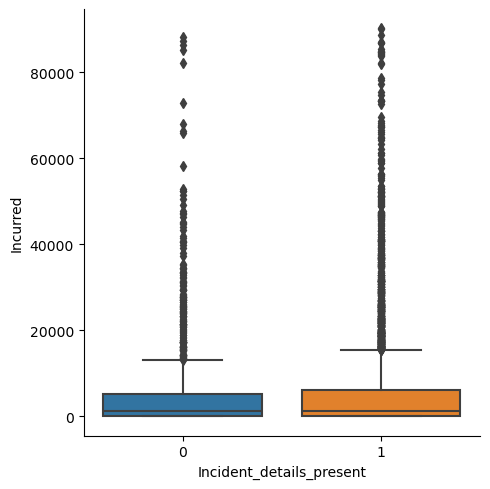

In [19]:
sns.catplot(x='Incident_details_present', y='Incurred', data=train_data, kind='box')

0.0042964730992199555


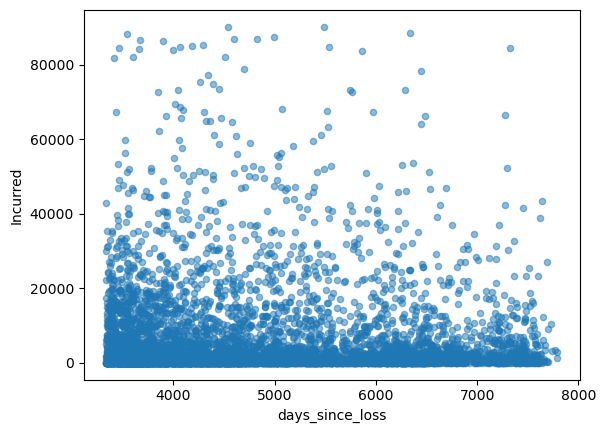

In [20]:
train_data.plot.scatter(x='days_since_loss', y='Incurred', alpha=0.5)

# Print correlation between Incurred and days_since_loss
print(train_data['Incurred'].corr(train_data['days_since_loss']))

<Axes: xlabel='TP_region_northw', ylabel='Incurred'>

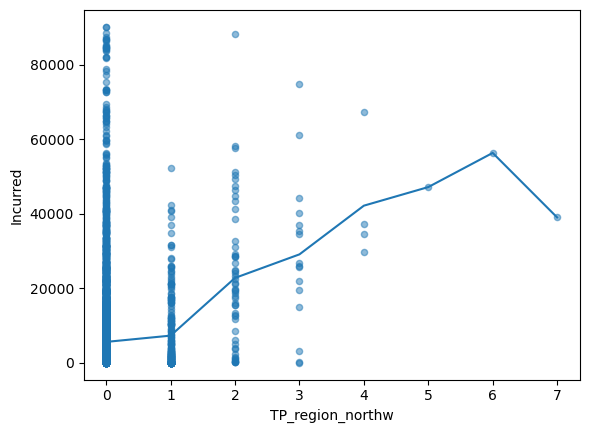

In [21]:
train_data.plot.scatter(x='TP_region_northw', y='Incurred', alpha=0.5)
train_data.groupby('TP_region_northw')['Incurred'].mean().plot()

<Axes: xlabel='TP_injury_whiplash', ylabel='Incurred'>

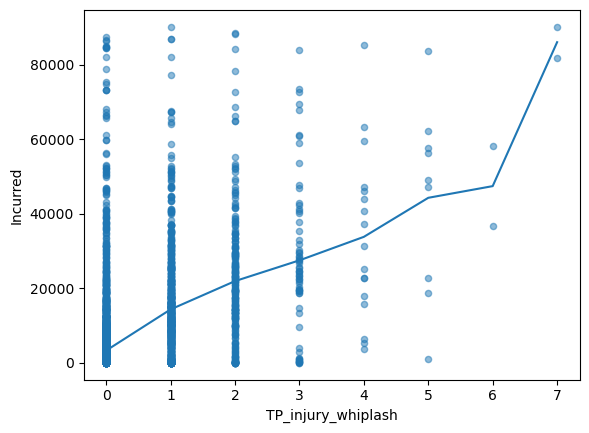

In [22]:
train_data.plot.scatter(x='TP_injury_whiplash', y='Incurred', alpha=0.5)
train_data.groupby('TP_injury_whiplash')['Incurred'].mean().plot()

<Axes: xlabel='TP_injury_fatality', ylabel='Incurred'>

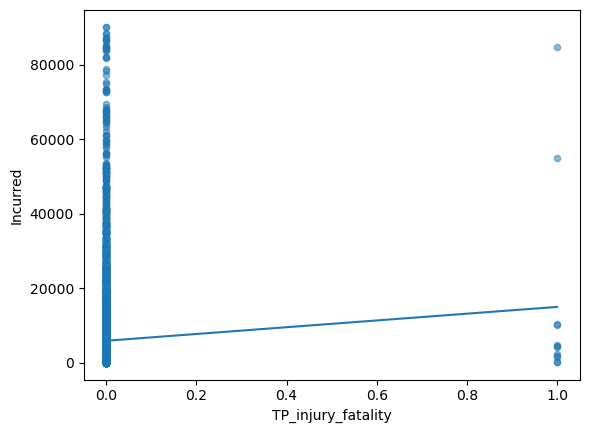

In [23]:
train_data.plot.scatter(x='TP_injury_fatality', y='Incurred', alpha=0.5)
train_data.groupby('TP_injury_fatality')['Incurred'].mean().plot()

<Axes: xlabel='Time_hour', ylabel='Incurred'>

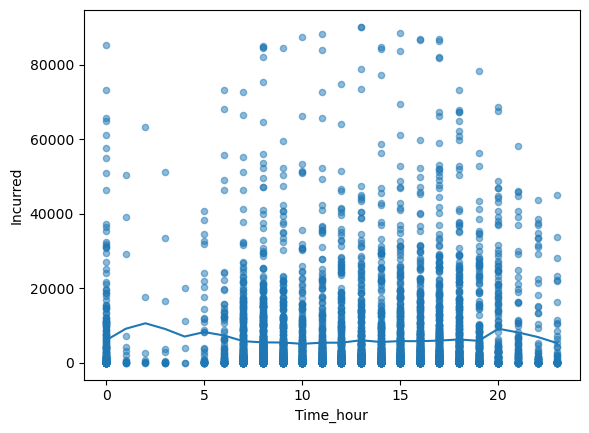

In [24]:
train_data.plot.scatter(x='Time_hour', y='Incurred', alpha=0.5)

# Plot median Incurred per hour
train_data.groupby('Time_hour')['Incurred'].mean().plot()

In [25]:
train_data.groupby('Time_hour')['Incurred'].mean()

Time_hour
0      6067.017740
1      9137.773801
2     10601.891472
3      9083.504167
4      7046.063187
5      8242.661369
6      7345.568566
7      5787.430617
8      5475.906598
9      5439.213520
10     5092.647582
11     5387.453492
12     5402.463721
13     6045.971971
14     5586.150406
15     5822.428496
16     5789.366820
17     5953.043319
18     6264.789156
19     5887.847288
20     9139.193754
21     8152.711829
22     6936.665163
23     5281.884147
Name: Incurred, dtype: float64